# Kaggle Climate Data Exploration
load and plot Kaggle data

In [87]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set() # Setting seaborn as default style even if use only matplotlib
%matplotlib inline

ValueError: context must be in paper, notebook, talk, poster

## Load Kaggle Data

In [88]:
tmp_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\Kaggle_data\FAOSTAT_data_1-10-2022.csv")
# create new datecolumn and transform to datetime first get a column that says unique data point or summary measure
sum_list = 'Dec?Jan?Feb', 'Mar?Apr?May', 'Jun?Jul?Aug', 'Sep?Oct?Nov', 'Meteorological year'
tmp_df['sum_val'] = tmp_df['Months'].apply(lambda row: row in sum_list)

# get the subset including the month
sub_tmp_df = tmp_df.loc[tmp_df['sum_val'] == False]

# transform to datetime and create a new column
sub_tmp_df['date'] = pd.to_datetime(sub_tmp_df['Months'] + '-' + sub_tmp_df['Year'].astype(str), format = '%B-%Y')

# create a variable season
def map_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
# save variable
sub_tmp_df['season'] = sub_tmp_df['Months'].apply(map_season)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juliu\AppData\Local\Temp\ipykernel_26364\1893443503.py:3: SyntaxWarning: invalid escape sequence '\D'
  tmp_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\Kaggle_data\FAOSTAT_data_1-10-2022.csv")
C:\Users\juliu\AppData\Local\Temp\ipykernel_26364\1893443503.py:3: SyntaxWarning: invalid escape sequence '\D'
  tmp_df = pd.read_csv(filepath_or_buffer ="D:\Data\Dropbox\LifeAfter\Datascientest\Climate\Data\Kaggle_data\FAOSTAT_data_1-10-2022.csv")


NameError: name 'style' is not defined

## Now let us plot temperature by Time and season

D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Programs\Miniconda\envs\climate\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

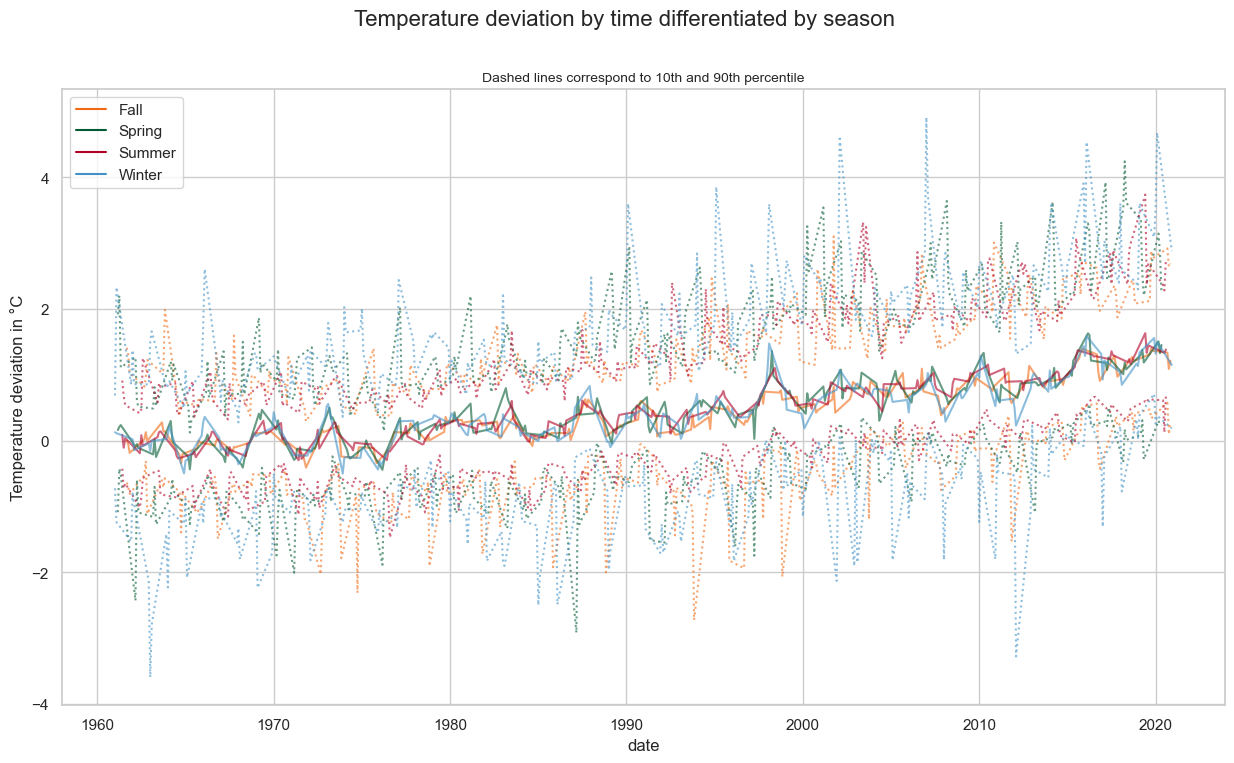

In [109]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
cpal = ['#f16913','#005a32', '#b10026', '#4292c6']
# get average values
sub_df = sub_tmp_df.groupby(["season", "date"]).agg({"Value":"median"}).reset_index()

ax = sns.lineplot(data = sub_df, y = "Value", x = "date",hue = "season",palette = cpal, alpha = 0.6);

# Plot the more extreme quantiles
sub_df_quant = sub_tmp_df.groupby(["season", "date"])['Value'].agg([
    ('10th_percentile', lambda x: x.quantile(0.1)),
    ('90th_percentile', lambda x: x.quantile(0.9))]).reset_index() 
sns.lineplot(data = sub_df_quant, y = '90th_percentile', x = "date",hue = "season", 
             palette = cpal, linestyle="dotted", alpha = 0.6,  ax = ax);

sns.lineplot(data = sub_df_quant, y = '10th_percentile', x = "date",hue = "season", 
             palette = cpal, linestyle="dotted", alpha = 0.6,  ax = ax);
plt.title("Dashed lines correspond to 10th and 90th percentile", fontsize = 10)
plt.suptitle("Temperature deviation by time differentiated by season",fontsize = 16)
plt.ylabel("Temperature deviation in °C")
# fix legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:4], labels[0:4]);

While on average temperatures rise across the board, looking at the 10th and 90th quantile values, we see that extreme temperatures (above and below) appear to be more common in winter as compared to summer for example.